# Mask R-CNN Demo

A quick intro to using the pre-trained model to detect and segment objects.

In [1]:
import os
import sys
import random
import math
import numpy as np
import skimage.io
import matplotlib
import matplotlib.pyplot as plt
import cv2
from glob import glob
# Root directory of the project
#ROOT_DIR = os.path.abspath("../../")

# Import Mask RCNN
#sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize

#sys.path.append(os.path.join(ROOT_DIR, "samples/birds/"))  # To find local version
import birds

%matplotlib inline 

# Directory to save logs and trained model
MODEL_DIR = os.path.join("logs")

# Local path to trained weights file
Birds_MODEL_PATH = os.path.join("logs/birds20190322T1604/mask_rcnn_birds_0197.h5")


# Directory of images to run detection on
IMAGE_DIR = os.path.join("birds/test")


Using TensorFlow backend.


In [2]:
#!conda create --name sultan-virtual --yes
#!source activate sultan-virtual
#!conda install --yes pip 
#!pip install git+https://github.com/aleju/imgaug
#!pip install tensorflow-gpu==1.10 
#!pip install keras
#!pip install --upgrade scikit-image
#config.display()

In [3]:
class InferenceConfig(birds.BirdsConfig):
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    DETECTION_MIN_CONFIDENCE = 0.2
config = InferenceConfig()


## Create Model and Load Trained Weights

In [4]:
# Create model object in inference mode.
model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR, config=config)
# Load weights trained 
model.load_weights(Birds_MODEL_PATH, by_name=True)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Re-starting from epoch 197


In [5]:
BIRDS_DIR = os.path.join("birds")
dataset = birds.BirdsDataset()
dataset.load_birds(BIRDS_DIR, "train")
dataset.prepare()
class_names = dataset.class_names
print(class_names)
len(class_names)

['BG', 'Acadian_Flycatcher', 'American_Crow', 'American_Goldfinch', 'Anna_Hummingbird', 'Baltimore_Oriole', 'Belted_Kingfisher', 'Black_Billed_Cuckoo', 'Black_Footed_Albatross', 'Blue_Grosbeak', 'Blue_Jay', 'Boat_Tailed_Grackle', 'Bobolink', 'Brandt_Cormorant', 'Brewer_Blackbird', 'Bronzed_Cowbird', 'Brown_Creeper', 'Brown_Pelican', 'California_Gull', 'Cardinal', 'Chuck_Will_Widow', 'Clark_Nutcracker', 'Crested_Auklet', 'Dark_Eyed_Junco', 'Eared_Grebe', 'Eastern_Towhee', 'European_Goldfinch', 'Evening_Grosbeak', 'Fish_Crow', 'Florida_Jay', 'Frigatebird', 'Gadwall', 'Glaucous_Winged_Gul', 'Gray_Catbird', 'Gray_Crowned_Rosy_Finch', 'Gray_Kingbird', 'Great_Crested_Flycatcher', 'Green_Jay', 'Green_Kingfisher', 'Green_Violetear', 'Groove_Billed_Ani', 'Heermann_Gull', 'Herring_Gull', 'Hooded_Merganser', 'Hooded_Oriole', 'Horned_Grebe', 'Horned_Lark', 'Indigo_Bunting', 'Ivory_Gull', 'Laysan_Albatross', 'Lazuli_Bunting', 'Least_Auklet', 'Least_Flycatcher', 'Long_Tailed_Jaeger', 'Mallard', 'Man

101

## Run Object Detection on Test set

Processing 1 images
image                    shape: (342, 500, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  150.10000  float64
image_metas              shape: (1, 113)              min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


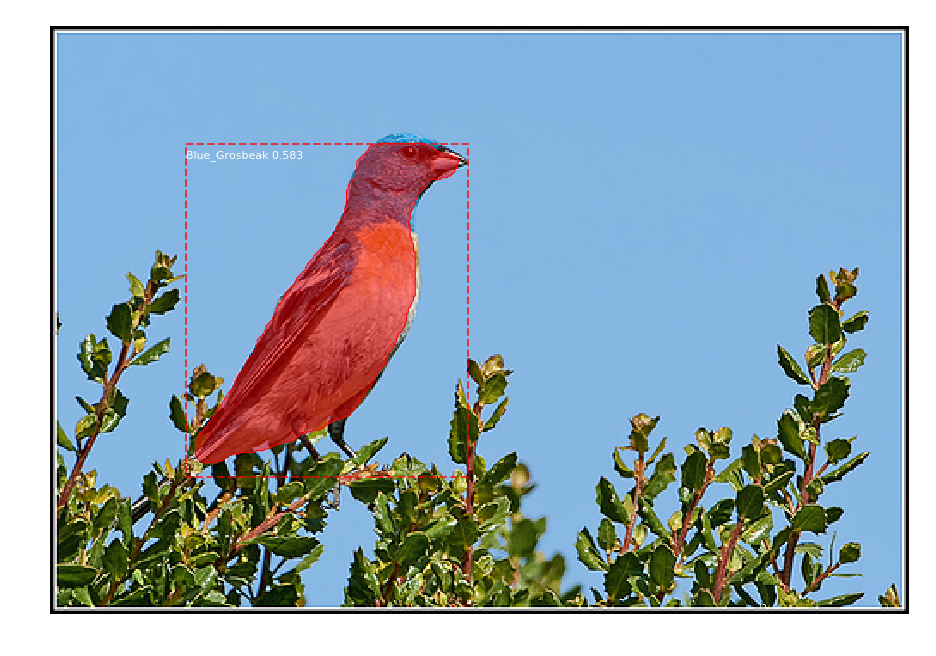

In [7]:
# Load a random image from the images folder
file_names = next(os.walk(IMAGE_DIR))[2]
image = skimage.io.imread(os.path.join(IMAGE_DIR, random.choice(file_names)))


# Load an image with specifc name from the images folder
#file_names =[os.path.join(IMAGE_DIR, 'Pacific_Loon{}.jpg'.format(i)) for i in range(1, 5) ]
#image = skimage.io.imread(os.path.join(IMAGE_DIR, random.choice(file_names)))
# Run detection
results = model.detect([image], verbose=1)

# Visualize results
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            class_names, r['scores'])

# Verfication

Processing 1 images
image                    shape: (533, 800, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 113)              min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


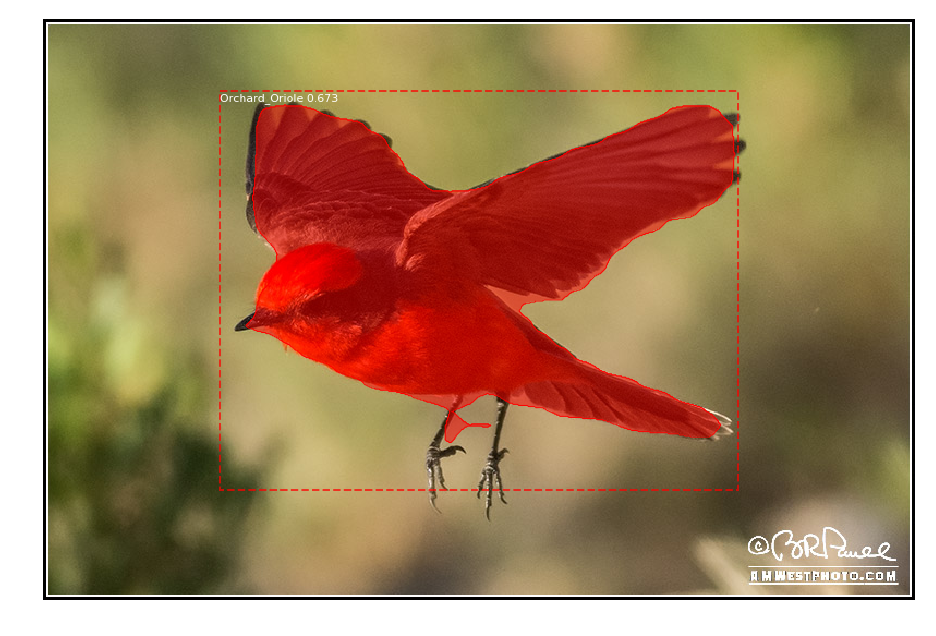

In [32]:
# Load a random image from the images folder
VER_DIR = os.path.join(ROOT_DIR, "tensorflow/Mask_RCNN/images")
file_names = next(os.walk(VER_DIR))[2]
image = skimage.io.imread(os.path.join(VER_DIR, random.choice(file_names)))
# Run detection
results = model.detect([image], verbose=1)

# Visualize results
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            class_names, r['scores'])